# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [105]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import datetime


In [106]:
browser = Browser('chrome')

In [15]:
pip install --upgrade splinter selenium

Note: you may need to restart the kernel to use updated packages.


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [107]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [108]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, "html.parser")
mars_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [109]:
# Find the weather table (adjust selector if needed)
mars_weather_table = mars_soup.find("table")  # Ensure correct element

# Debugging output to check the table
if mars_weather_table:
    print("Table found!")
    table_elements = mars_weather_table.find_all('tr')  # Extract all rows
    
    # List to store extracted data
    data_rows = []
    
    # Loop through rows
    for row in table_elements:
        cell_values = row.find_all("td")  # Extract table cells
        values = [cell.text.strip() for cell in cell_values]  # Get text from each cell
        
        if values:  # Avoid adding empty rows
            data_rows.append(values)  

    print("Extracted Data:", data_rows)  # Debugging output
else:
    print("Table not found.")


Table found!
Extracted Data: [['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [110]:
# Create an empty list
data_rows = []

# Loop through the scraped data to create a list of rows
for row in table_elements:
    cell_values = row.find_all("td")
    values = []
    for value in cell_values:
        values.append(value.text)
    data_rows.append(values)

data_rows

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [111]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df= pd.DataFrame(data_rows, columns= ['id','terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [112]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [113]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [122]:
# Fill missing values with 0 or another appropriate value before converting
mars_df["sol"] = mars_df["sol"].fillna(0).astype(int)
mars_df["ls"] = mars_df["ls"].fillna(0).astype(int)
mars_df["month"] = mars_df["month"].fillna(0).astype(int)
mars_df["min_temp"] = mars_df["min_temp"].fillna(0.0).astype(float)
mars_df["pressure"] = mars_df["pressure"].fillna(0.0).astype(float)

# Convert 'terrestrial_date' column to datetime
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"], errors='coerce')


In [123]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [124]:
# 1. How many months are there on Mars?
months= mars_df["month"].value_counts().sort_index()
months

month
0       1
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [125]:
# 2. How many sols (Martian days) worth of data are there?
martian_days= (len(mars_df["sol"].unique()))
martian_days

1868

In [126]:
# 3. What is the average minimum temperature by month?
average_low_temp= mars_df.groupby(["month"]).mean(["min_temp"])
simplified_low_temp= average_low_temp.filter(["month", "min_temp"])
simplified_low_temp

,min_temp
month,
0,0.000000
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979


<function matplotlib.pyplot.show(close=None, block=None)>

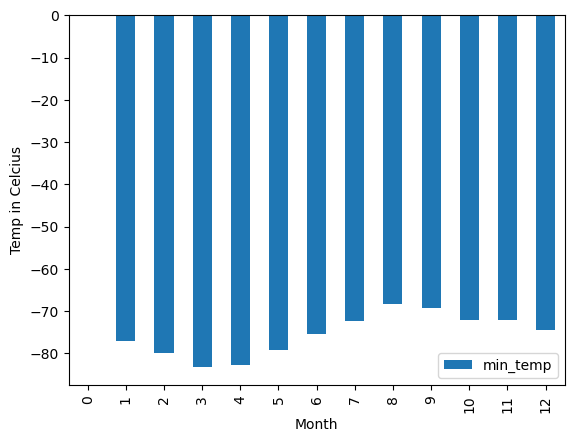

In [127]:
# Plot the average minimum temperature by month
simplified_low_temp.plot(kind="bar")
plt.ylabel("Temp in Celcius")
plt.xlabel("Month")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

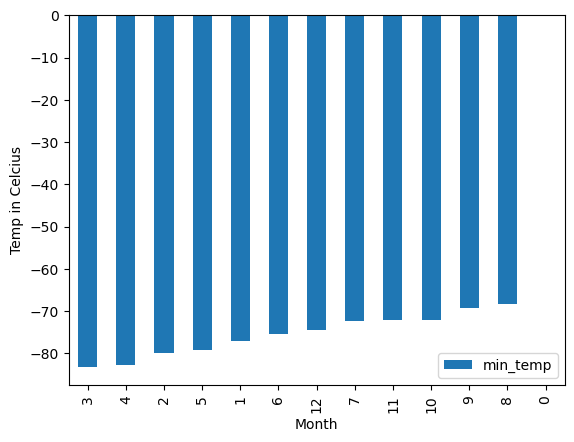

In [131]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
cold_hot= simplified_low_temp.sort_values(by = "min_temp", ascending= True)
cold_hot.plot(kind= "bar")
plt.ylabel("Temp in Celcius")
plt.xlabel("Month")
plt.show

In [132]:
# 4. What is the average pressure by month?
average_pressure= mars_df.groupby(["month"]).mean(["pressure"])
simplified_pressure= average_low_temp.filter(["month", "pressure"])
simplified_pressure

,pressure
month,
0,0.000000
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787


<function matplotlib.pyplot.show(close=None, block=None)>

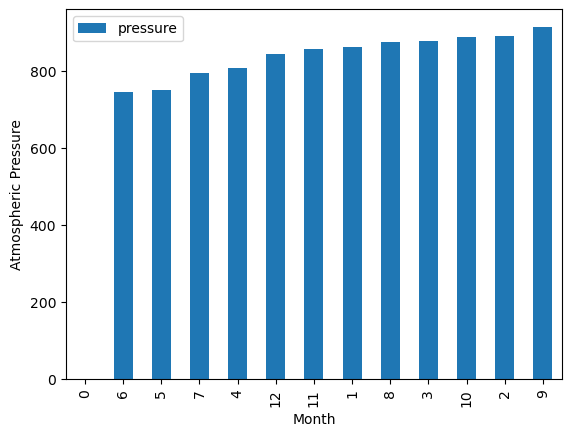

In [130]:
# Plot the average pressure by month
pressure_by_month= simplified_pressure.sort_values(by = "pressure", ascending= True)
pressure_by_month.plot(kind= "bar")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Month")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

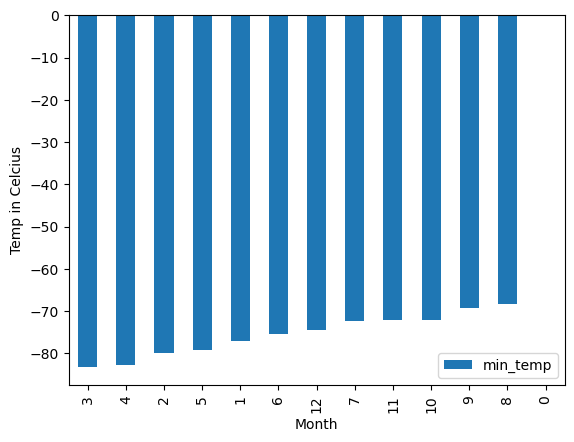

In [133]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
cold_hot= simplified_low_temp.sort_values(by = "min_temp", ascending= True)
cold_hot.plot(kind= "bar")
plt.ylabel("Temp in Celcius")
plt.xlabel("Month")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

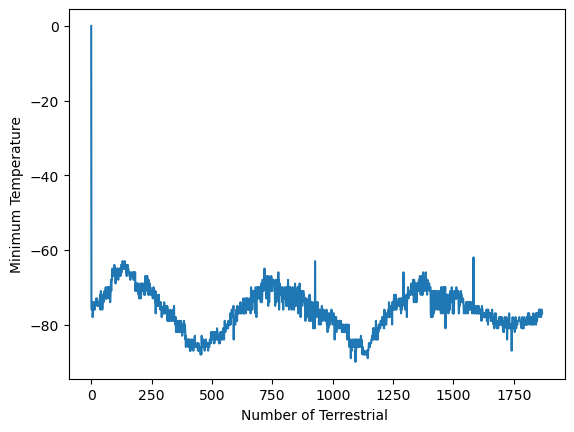

In [134]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df["min_temp"].plot(kind="line")
plt.ylabel("Minimum Temperature")
plt.xlabel("Number of Terrestrial ")
plt.show

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [137]:
# Write the data to a CSV
output_path = "mars_data.csv"
mars_df.to_csv(output_path)

In [138]:
browser.quit()